<a href="https://colab.research.google.com/github/axz91/RGC/blob/main/MRS_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nmrglue

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 4.2 MB/s eta 0:00:00


### 1D CSI MRS experiment (2D matrix).

In [ ]:
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt

# read in the data from a NMRPipe file
data = ng.fileio.bruker.read(
    dir='/content/drive/MyDrive/70_ENC2020/1/', bin_file="fid",
    pprog_file="pulseprogram")


data


/usr/local/lib/python3.10/dist-packages/nmrglue/fileio/bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')
/usr/local/lib/python3.10/dist-packages/nmrglue/fileio/bruker.py:1554: UserWarning: (18432,)cannot be shaped into(1024,)
  warn(str(data.shape) + "cannot be shaped into" + str(shape))


({'procs': {'_coreheader': ['##TITLE=Parameter List, ParaVision 6.0.1',
    '##JCAMPDX=4.24',
    '##DATATYPE=Parameter Values',
    '##ORIGIN=Bruker BioSpin MRI GmbH',
    '##OWNER=nmrsu'],
   '_comments': ['$$ 2019-12-07 16:32:01.949 -0500  nmrsu@CZC642BNVQ',
    '$$ /opt/PV6.0.1/data/nmrsu/20191201_181536_V9_4T_GapR_1_1/70/pdata/1/procs',
    '$$ process /opt/PV6.0.1/prog/bin/parxserver'],
   'OFFSET': 4.99568064058648,
   'SF': 400.345847521031,
   'YMAX_p': 32766,
   'YMIN_p': 1},
  'FILE_SIZE': 73728},
 array([ -484, -1037,   648, ...,  1054,   825,     7], dtype=int32))

In [ ]:
data[1].shape

(18432,)

In [ ]:
data = data[1]


In [ ]:
data.shape

(18432,)

In [ ]:
# Convert real numbers into complex numbers where the imaginary part is zero
complex_array = np.array([np.complex(x) for x in data])

<ipython-input-5-36db8d0b952a>:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  complex_array = np.array([np.complex(x) for x in data])


In [ ]:
complex_array

array([ -484.+0.j, -1037.+0.j,   648.+0.j, ...,  1054.+0.j,   825.+0.j,
           7.+0.j])

In [ ]:

reshaped_array = complex_array.reshape((36, 512))

# Transpose the array to get a shape of (512, 36)
data = reshaped_array.T

In [ ]:
data[:,1]

array([-3.9100e+02+0.j, -1.1200e+02+0.j, -1.5160e+03+0.j,  7.8300e+02+0.j,
       -1.6130e+03+0.j, -2.9800e+02+0.j, -2.4000e+01+0.j, -2.5000e+02+0.j,
        2.8720e+03+0.j, -1.5350e+03+0.j, -5.9100e+02+0.j, -3.0120e+03+0.j,
       -7.0900e+02+0.j,  2.8650e+03+0.j,  2.1340e+03+0.j,  4.8900e+02+0.j,
       -1.5550e+03+0.j, -1.4050e+03+0.j,  1.1700e+02+0.j,  2.5030e+03+0.j,
        2.4440e+03+0.j, -1.7330e+03+0.j,  3.0300e+02+0.j,  6.1300e+02+0.j,
       -1.5700e+03+0.j,  3.5540e+03+0.j,  2.6860e+03+0.j, -1.7700e+02+0.j,
       -1.4630e+03+0.j, -8.3300e+02+0.j,  1.4000e+02+0.j,  1.5200e+03+0.j,
        1.8720e+03+0.j, -2.6220e+03+0.j, -3.0470e+03+0.j, -3.2400e+03+0.j,
       -3.7000e+01+0.j,  2.9480e+03+0.j,  3.2170e+03+0.j, -2.3120e+03+0.j,
       -2.4050e+03+0.j,  3.9600e+02+0.j,  8.1200e+02+0.j,  2.7730e+03+0.j,
        6.6600e+02+0.j, -2.9010e+03+0.j, -4.0560e+03+0.j,  3.5700e+02+0.j,
        3.1920e+03+0.j,  2.0140e+03+0.j,  5.0700e+02+0.j, -4.0780e+03+0.j,
       -3.2040e+03+0.j, -

In [ ]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# READ THE 2048 X 2048 MATRIX
##############################
data_dim1 = data
#############################

# FFT the 2048 x 2048 matrix VIA THE AXIS 1
fft_data_dim1_axis_0 = np.fft.fft(data_dim1 ,axis=0)


# SHIFT OVER AXIS 1
fft_data_dim1_shift_0 = np.fft.fftshift(fft_data_dim1_axis_0,axes=(0)
)

# GET THE REAL NUMBER PART OF FIRST MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim1_real = np.real(fft_data_dim1_shift_0)
# GET THE IMAG PART OF THE FIRST MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim1_imag = np.imag(fft_data_dim1_shift_0)
# GET THE ABS VALUE OF FIRST MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim1_abs = abs(fft_data_dim1_shift_0)





# FFT the 2048 x 2048 matrix VIA THE AXIA 2
fft_data_dim2_axis_1 = np.fft.fft(fft_data_dim1_shift_0,axis=1)
# SHIFT OVER AXIA 2
fft_data_dim2_shift_1 = np.fft.fftshift(fft_data_dim2_axis_1, axes=(1))



# GET THE REAL NUMBER PART OF SECOND MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_real = np.real(fft_data_dim2_shift_1)
# GET THE IMAG PART OF THE SECOND MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_imag = np.imag(fft_data_dim2_shift_1)
# GET THE ABS VALUE OF SECOND MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim2_abs = np.abs(fft_data_dim2_shift_1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_columns_with_offsets_no_norm(data, start_column, end_column, x_offset, y_offset):

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(40, 40))

    # Plot each column as a separate line with horizontal and vertical offsets
    for i in range(start_column-1, end_column):  # Subtract 1 here to convert from 1-indexing to 0-indexing
        ax.plot(np.arange(data.shape[0]) + i*x_offset, data[:, i] + i*y_offset, label=f'Spectrum {i+1}')  # Add 1 here to convert back for the label

    # Add labels
    ax.set_xlabel('Rows (with offset)')
    ax.set_ylabel('Non-normalized Values (with offset)')

    # Show the legend
    ax.legend(loc='upper left')
    ax.set_title(f'Spectrum {start_column} to {end_column}', size=28)

    # Save the figure
    fig.savefig("1.pdf", format='pdf', bbox_inches='tight')

    # Show the plot
    #plt.show()

    #return fig


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


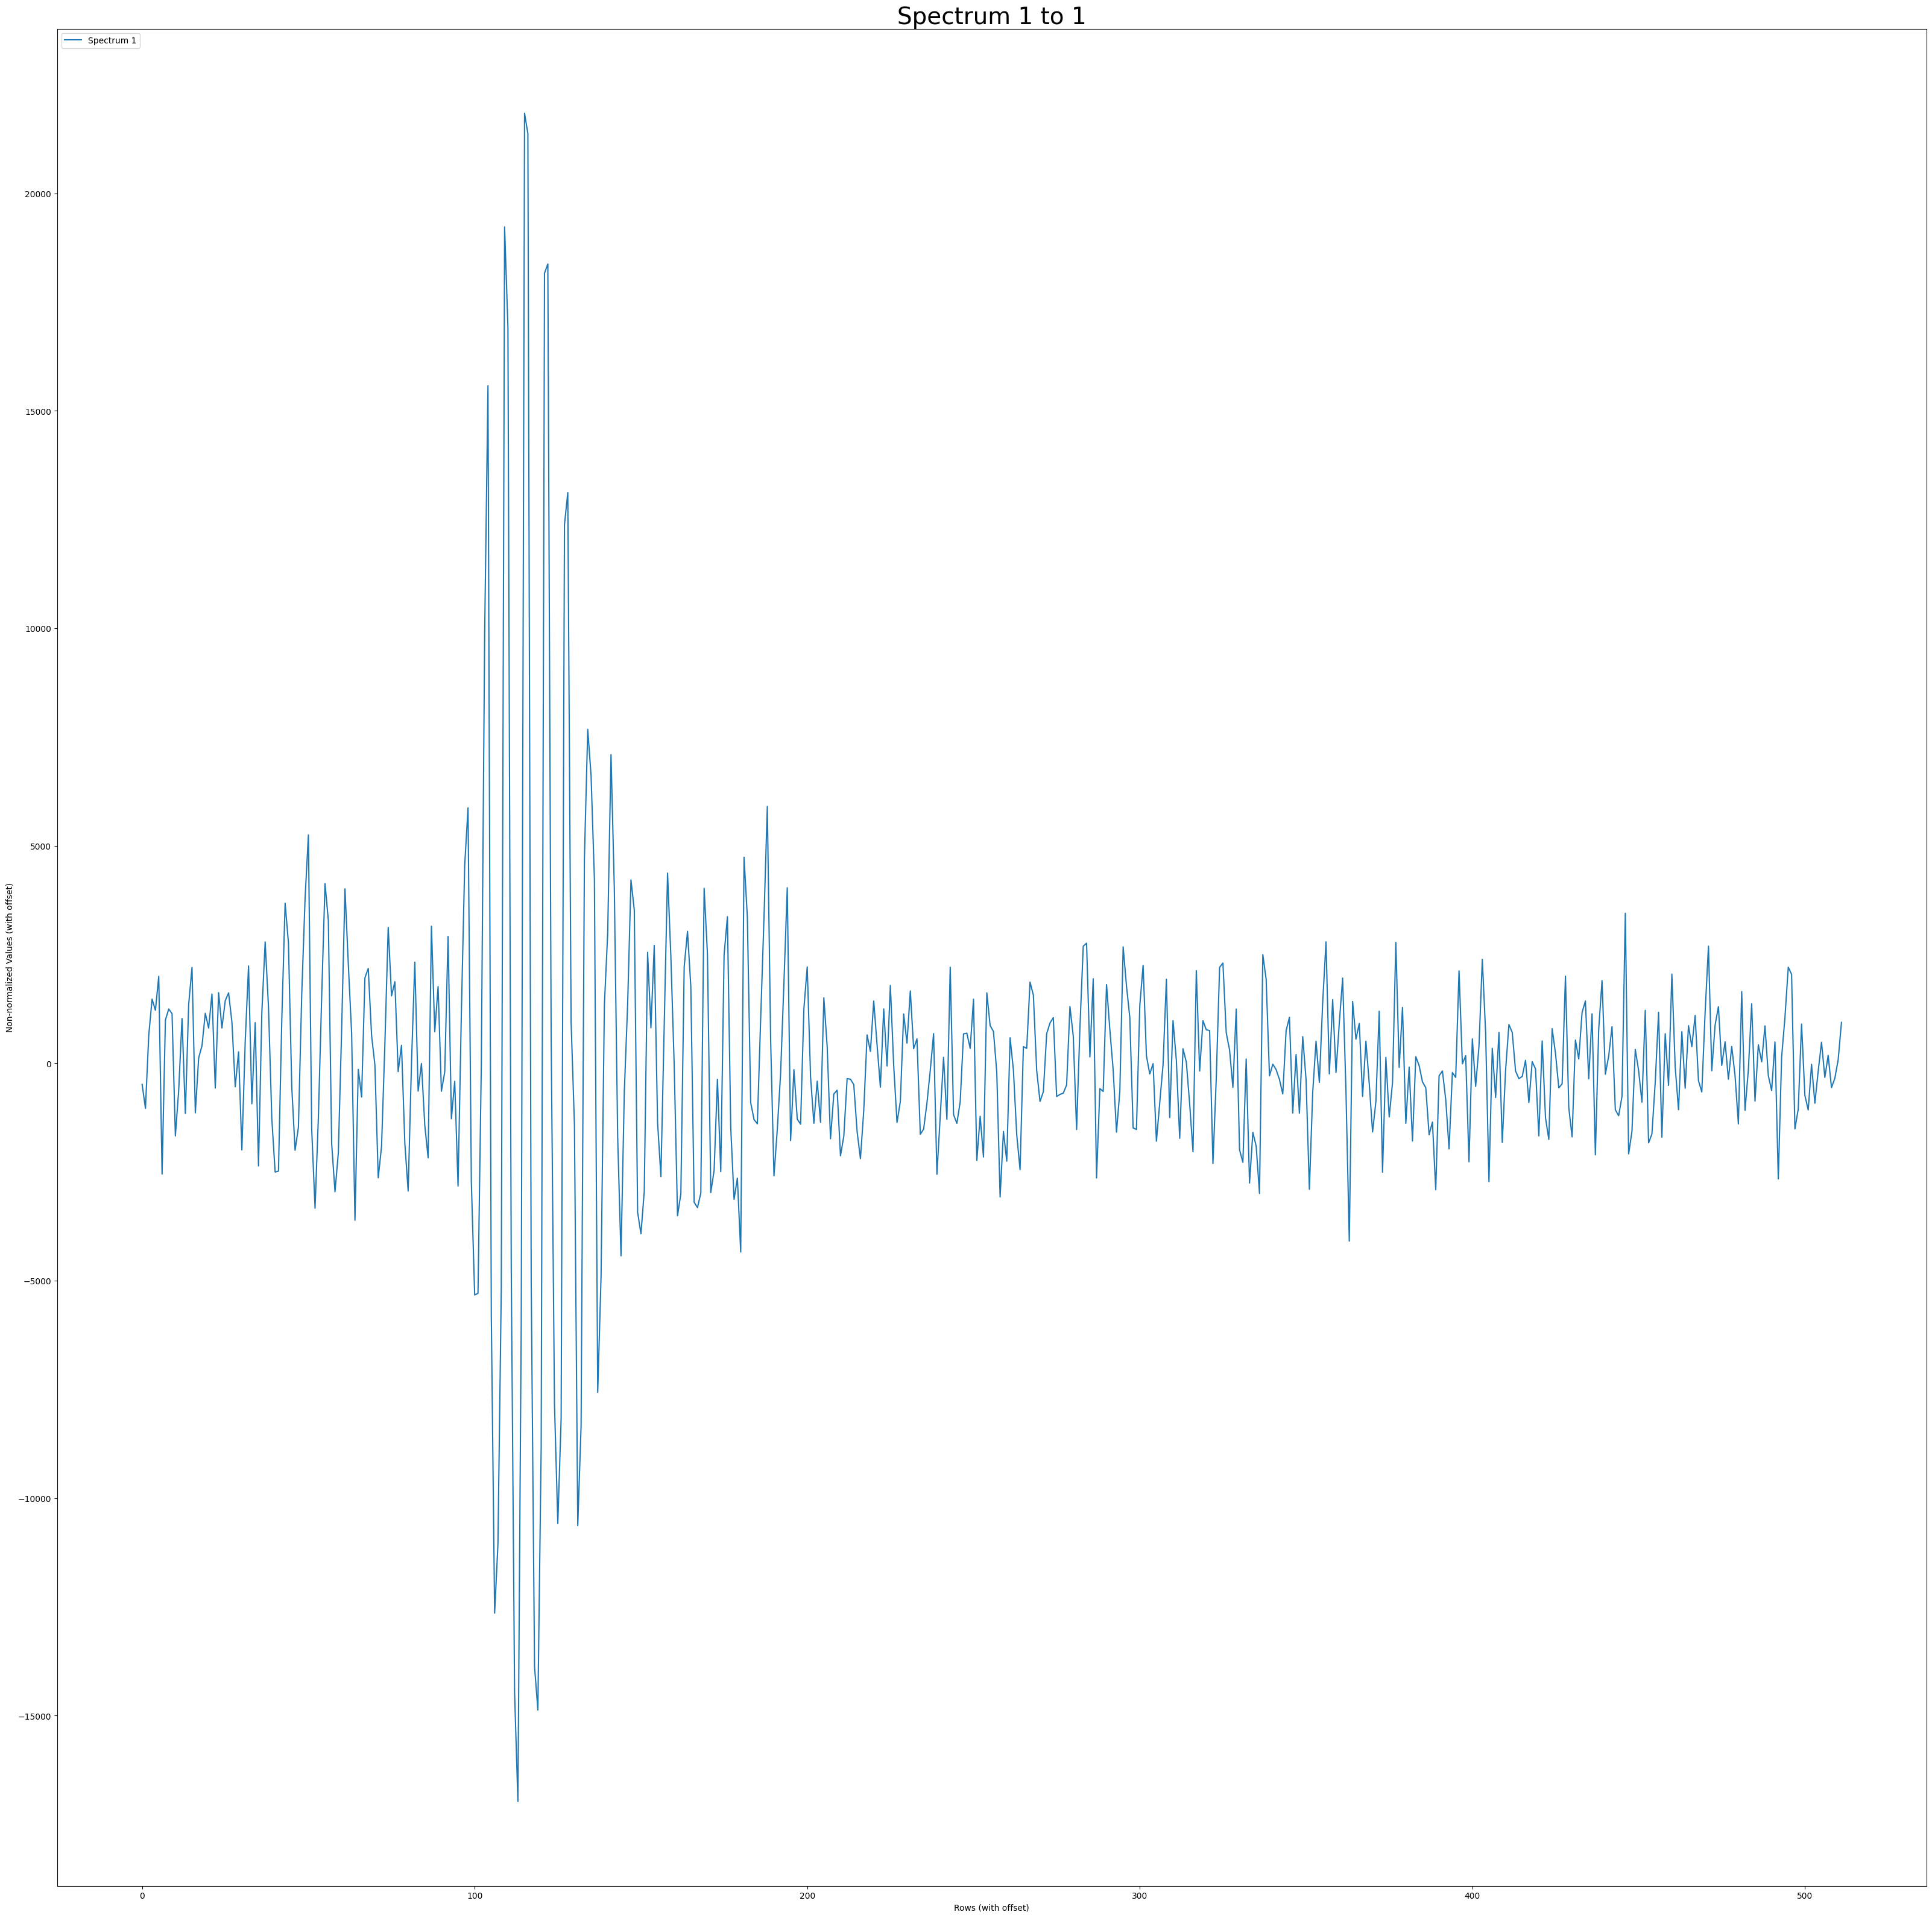

In [ ]:
plot_columns_with_offsets_no_norm(data,1,1,0,0)

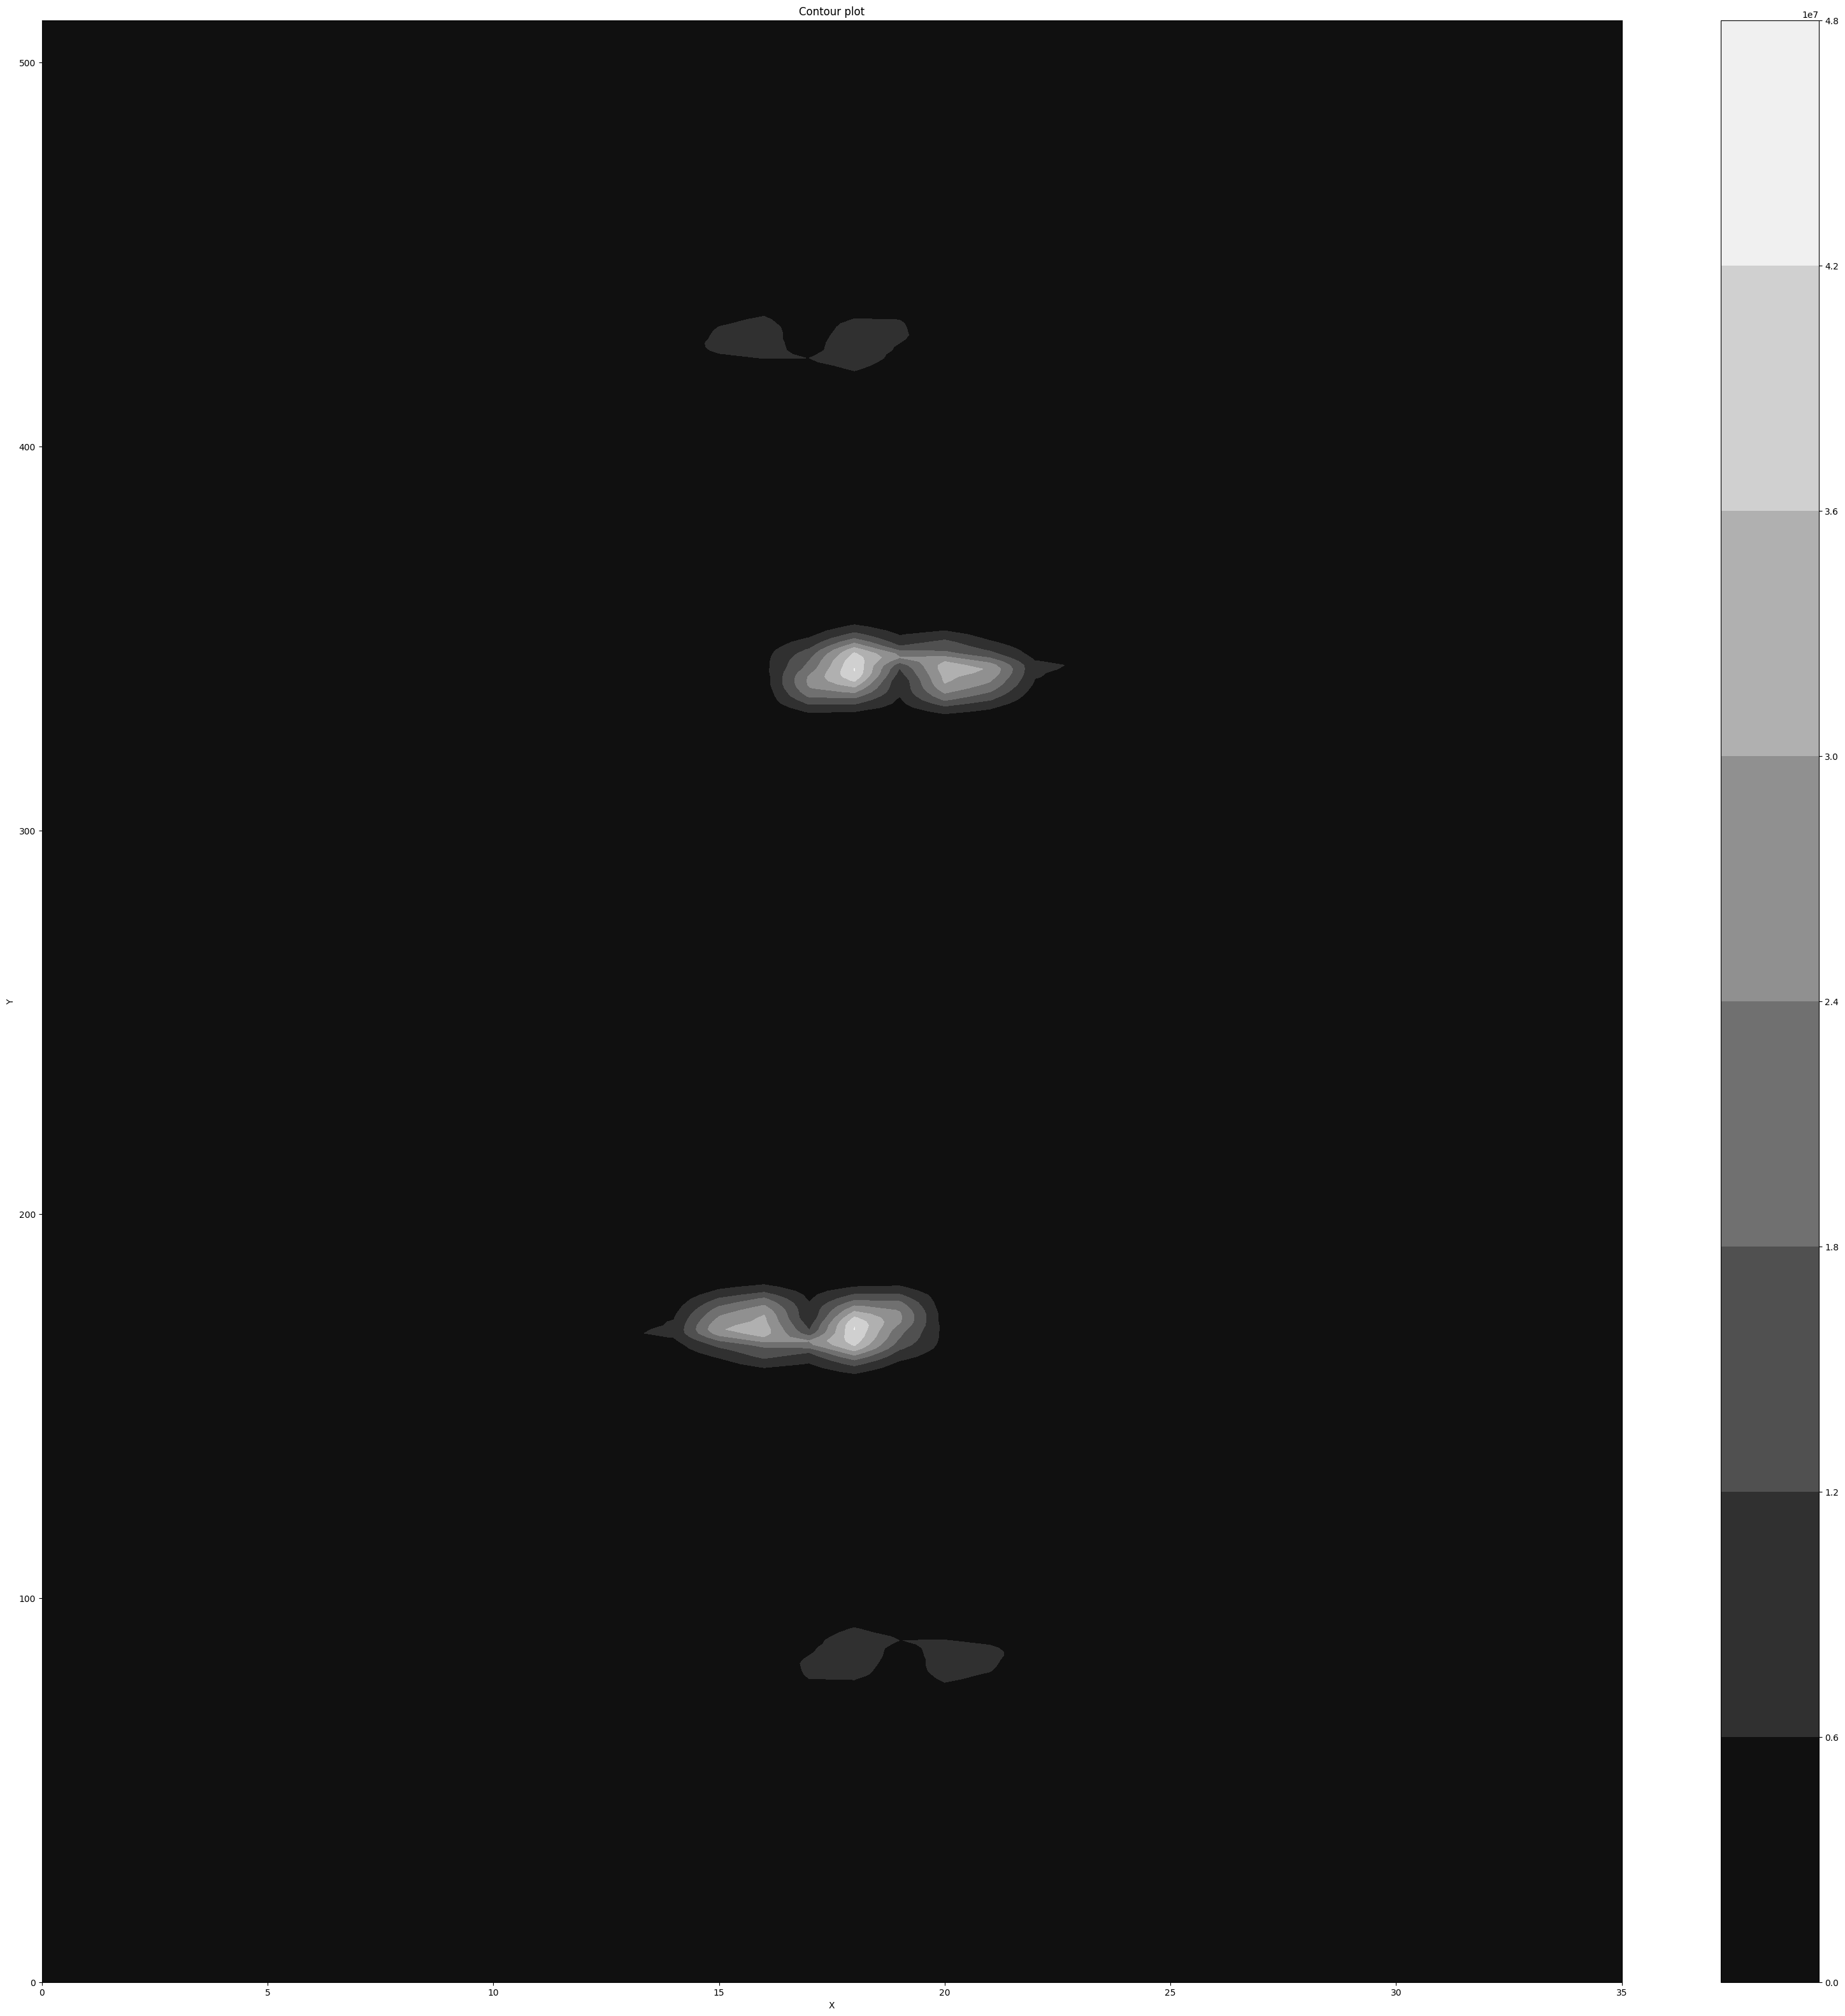

In [ ]:
from typing_extensions import dataclass_transform

import matplotlib.pyplot as plt
import numpy as np


plot_data =  fft_data_dim2_abs

# assuming fft_data_dim2_abs is the 2D data
# generate grid for the contour plot
x = np.arange(0, plot_data.shape[1])
y = np.arange(0, plot_data.shape[0])
X, Y = np.meshgrid(x, y)

# create the contour plot
plt.figure(figsize=(40, 40))
plt.contourf(X, Y, plot_data, cmap='gray') # Change colormap
plt.colorbar()  # optional, to show color scale
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



#### Orginal stacked

In [ ]:
plot_columns_with_offsets_no_norm(data,1,1,0,0)

NameError: ignored

##### 2d

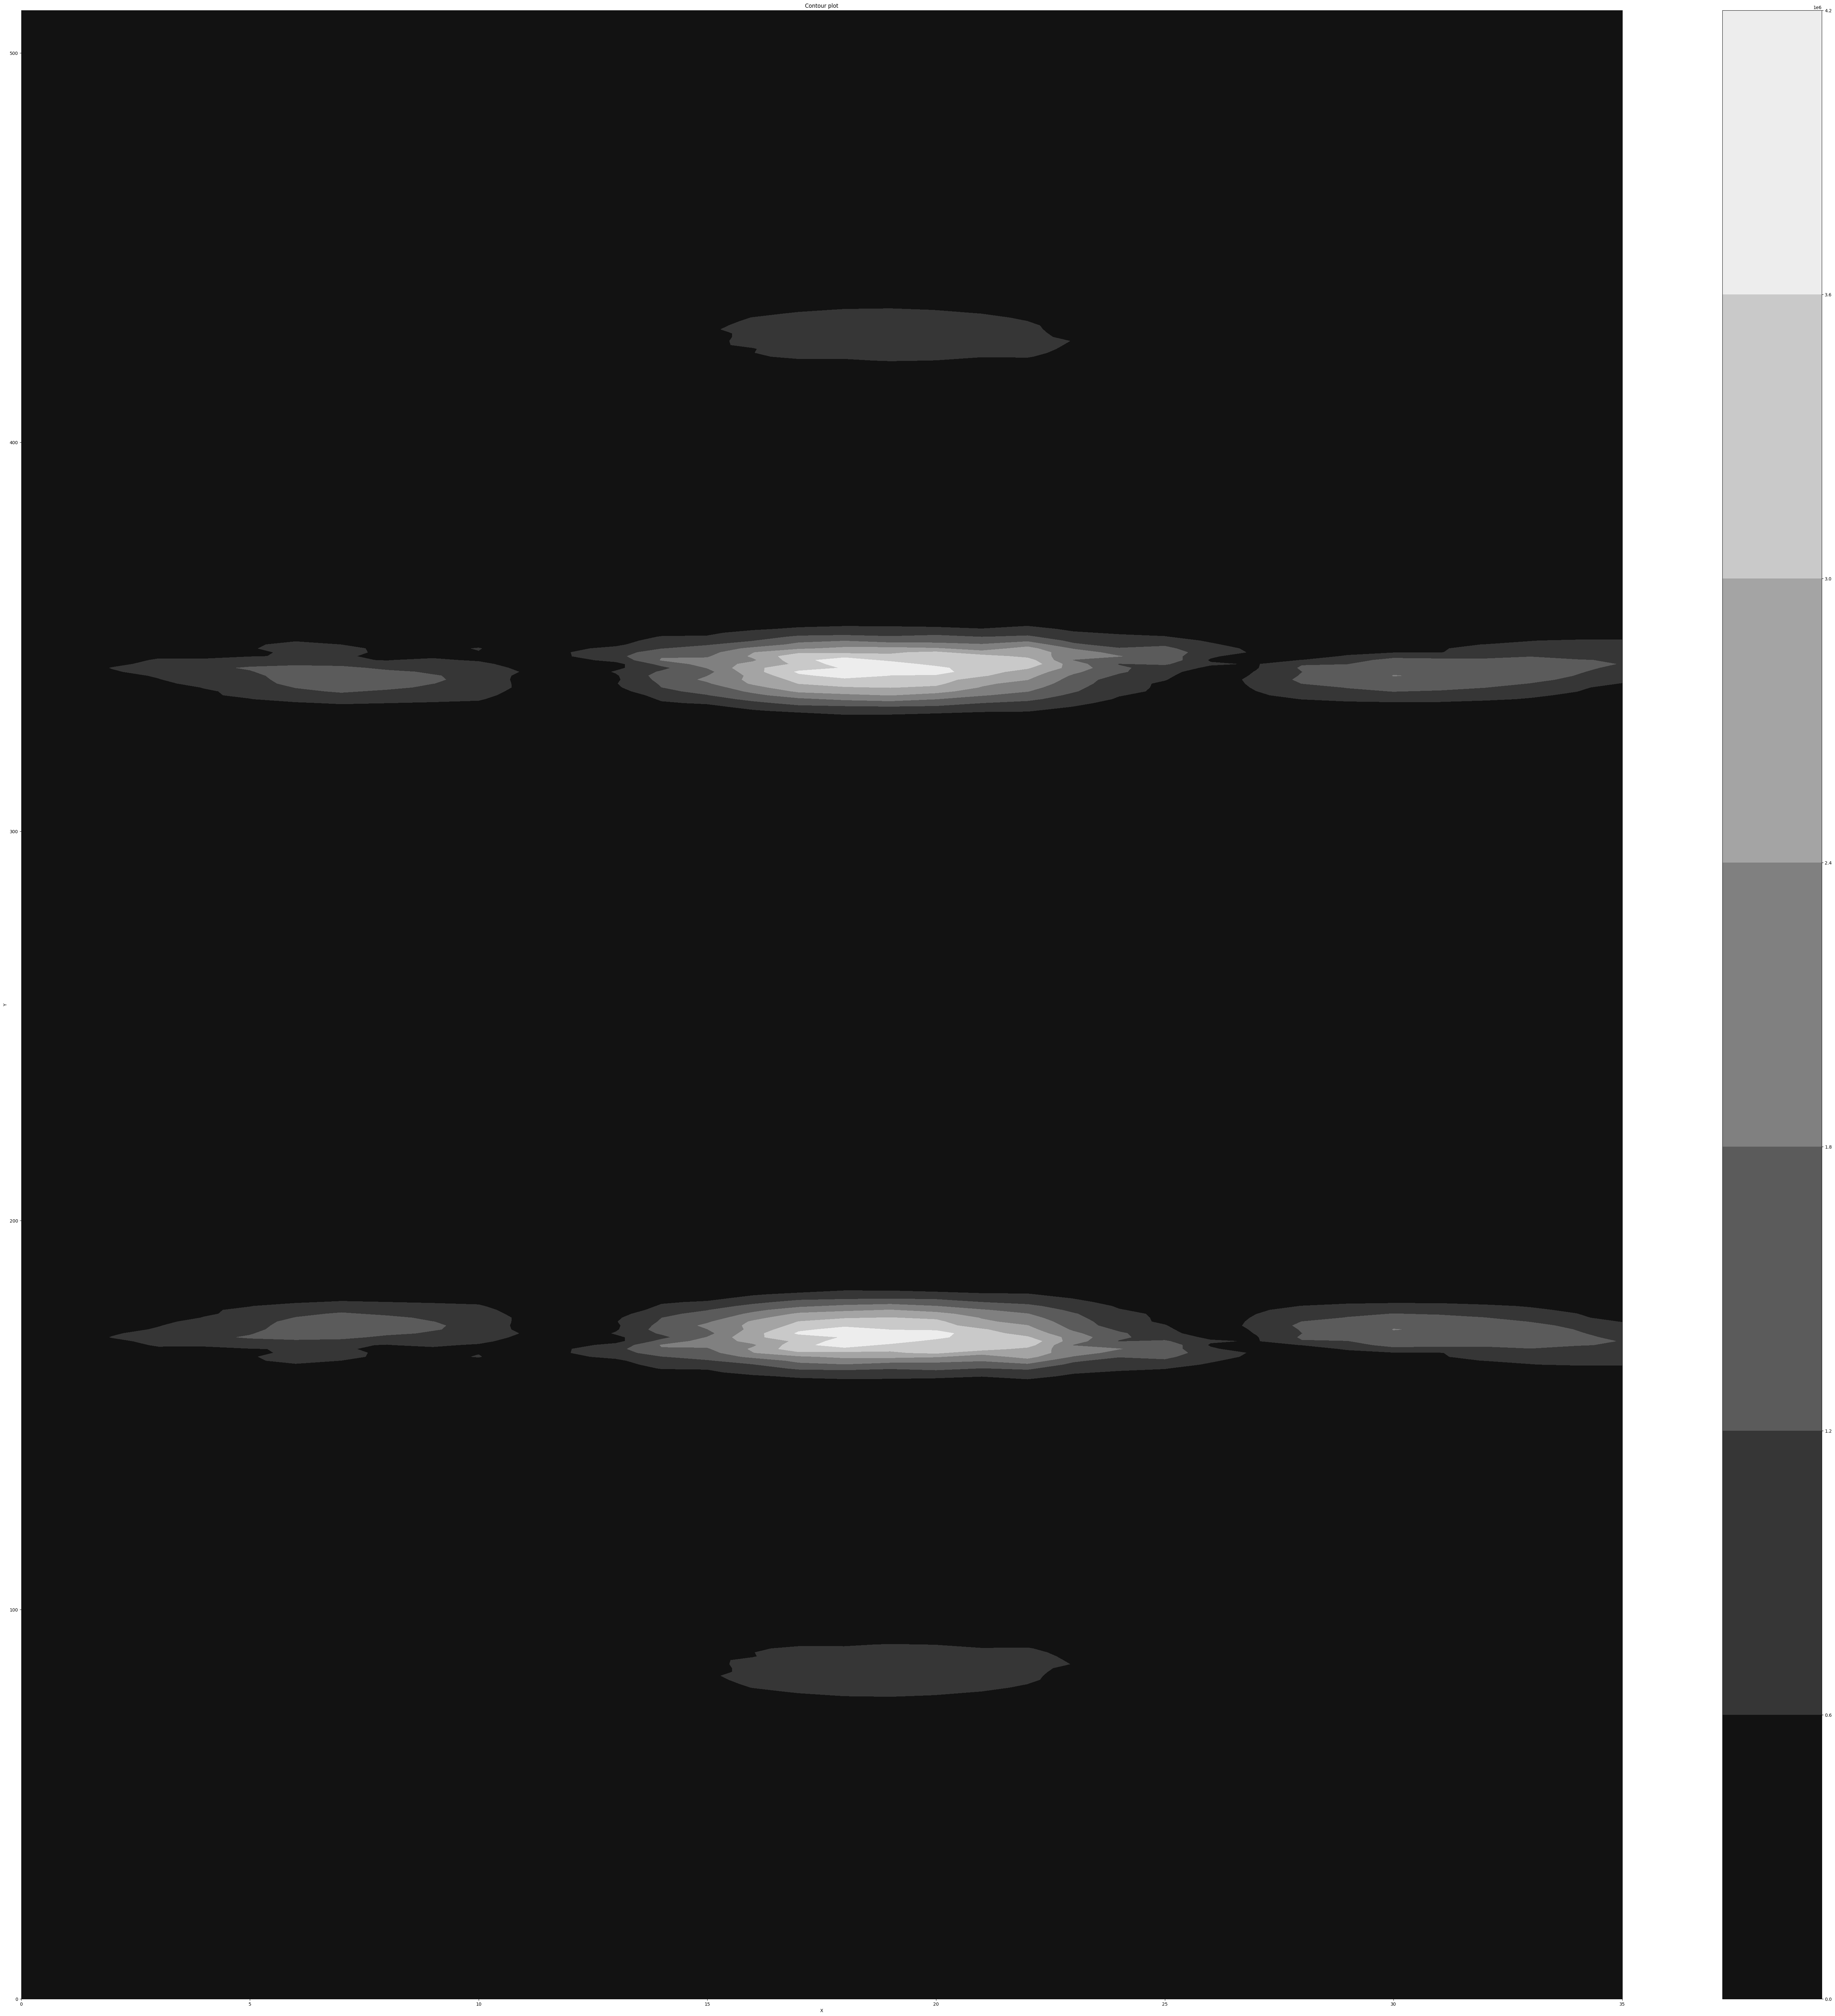

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fft_data_dim2_abs =  fft_data_dim2_abs
# assuming fft_data_dim2_abs is the 2D data
# generate grid for the contour plot
x = np.arange(0, fft_data_dim2_abs.shape[1])
y = np.arange(0, fft_data_dim2_abs.shape[0])
X, Y = np.meshgrid(x, y)

# create the contour plot
plt.figure(figsize=(80, 80))
plt.contourf(X, Y, fft_data_dim2_abs, cmap='gray') # Change colormap
plt.colorbar()  # optional, to show color scale
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Ployfit

In [ ]:
fft_data_dim1_shift_0

array([[ 24994.            +0.j        ,  21367.            +0.j        ,
         -3298.            +0.j        , ...,
        -58430.            +0.j        , -28417.            +0.j        ,
        -22355.            +0.j        ],
       [  8110.45575577+19467.22671853j,  44908.27716369 -6916.00787445j,
          2073.21441082 +3051.54691654j, ...,
        -46733.91119216 +4505.91195063j, -95009.88723262 +3995.03743216j,
        -44290.51268568-46983.73661619j],
       [-30247.04707446 +4182.07700495j, -36538.6577865 -21780.69526932j,
          2700.83843318-32348.04516818j, ...,
        -78645.76307885+75755.88492017j, -28568.10457406+84704.58027141j,
        -38994.89447394+38182.14849476j],
       ...,
       [-35264.47115269 +1551.8592098j ,   1562.06699218-23253.43517119j,
          8078.37841742 +2373.15105396j, ...,
         71322.79292099-75345.57518731j,  82110.68738526 +3989.1553217j ,
         53840.11630722 -4748.79978228j],
       [-30247.04707446 -4182.07700495j, -36

In [ ]:
import numpy as np

# Assuming fft_data_dim1_shift_0 is the input

# Create an array for x values
x = np.arange(512)

# Initialize arrays to store fitted values
fitted_values_real = np.zeros_like(fft_data_dim1_real)
fitted_values_imag = np.zeros_like(fft_data_dim1_imag)

# loop iterates over the number of columns in fft_data_dim1_shift_0
for i in range(fft_data_dim1_shift_0.shape[1]):
    # Separate real and imaginary parts
    y_real = fft_data_dim1_real[:, i]
    y_imag = fft_data_dim1_imag[:, i]

    # Fit a degree 12 polynomial (change 2 to whatever degree you want)
    # 12 degree polynomial is fitted to the real and imaginary parts, return the coeff numbers
    coeff_real = np.polyfit(x, y_real, 12)
    coeff_imag = np.polyfit(x, y_imag, 12)

    # get the polynomial fitted data at each x
    fitted_values_real[:, i] = np.polyval(coeff_real, x)
    fitted_values_imag[:, i] = np.polyval(coeff_imag, x)

# Combine real and imaginary parts to get fitted values
fitted_values = fitted_values_real + 1j * fitted_values_imag

In [ ]:
fitted_values

array([[  2719.2410428  +5034.21570771j,  47044.54382286  +345.80563941j,
        -18757.53197961 +3855.43759836j, ...,
           -50.53332014-20399.79961017j,  21723.44115785 -5389.8072111j ,
          4834.22871287 +6250.07098691j],
       [  2423.07628866 +3905.19509623j,  32466.50796051 +4938.95588297j,
        -19799.33381568 +5763.50735671j, ...,
         -2864.98763156-18052.66589715j,  14060.31552972 -2813.19433599j,
          2544.63997991 +5165.87169901j],
       [  2079.42259465 +2924.49862841j,  19639.97813917 +8978.44151497j,
        -20601.00452666 +7389.23389868j, ...,
         -5376.82576585-15810.86471478j,   7242.28105668  -484.82229557j,
           513.49325464 +4278.83706764j],
       ...,
       [  7838.74271201 -3275.17026758j,   5288.01804107-12592.38282371j,
        -14570.5901073  -9676.36564493j, ...,
         -4928.63873851+18521.03078579j,  -3520.86757803  -332.05621578j,
         -2591.56762558 -5056.92861768j],
       [  9391.2884345  -4401.09328666j,  15

In [ ]:
fitted_values.shape

(512, 36)

In [ ]:
fitted_values = np.fft.fftshift(fitted_values)

In [ ]:
fft_data_dim1_shift_0 = fitted_values

# FFT the 2048 x 2048 matrix VIA THE AXIA 2
fft_data_dim2_axis_1 = np.fft.fft(fft_data_dim1_shift_0,axis=1)
# SHIFT OVER AXIA 2
fft_data_dim2_shift_1 = np.fft.fftshift(fft_data_dim2_axis_1, axes=(1) )



# GET THE REAL NUMBER PART OF SECOND MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_real = np.real(fft_data_dim2_shift_1)
# GET THE IMAG PART OF THE SECOND MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_imag = np.imag(fft_data_dim2_shift_1)
# GET THE ABS VALUE OF SECOND MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim2_abs = np.abs(fft_data_dim2_shift_1)

##### stacked

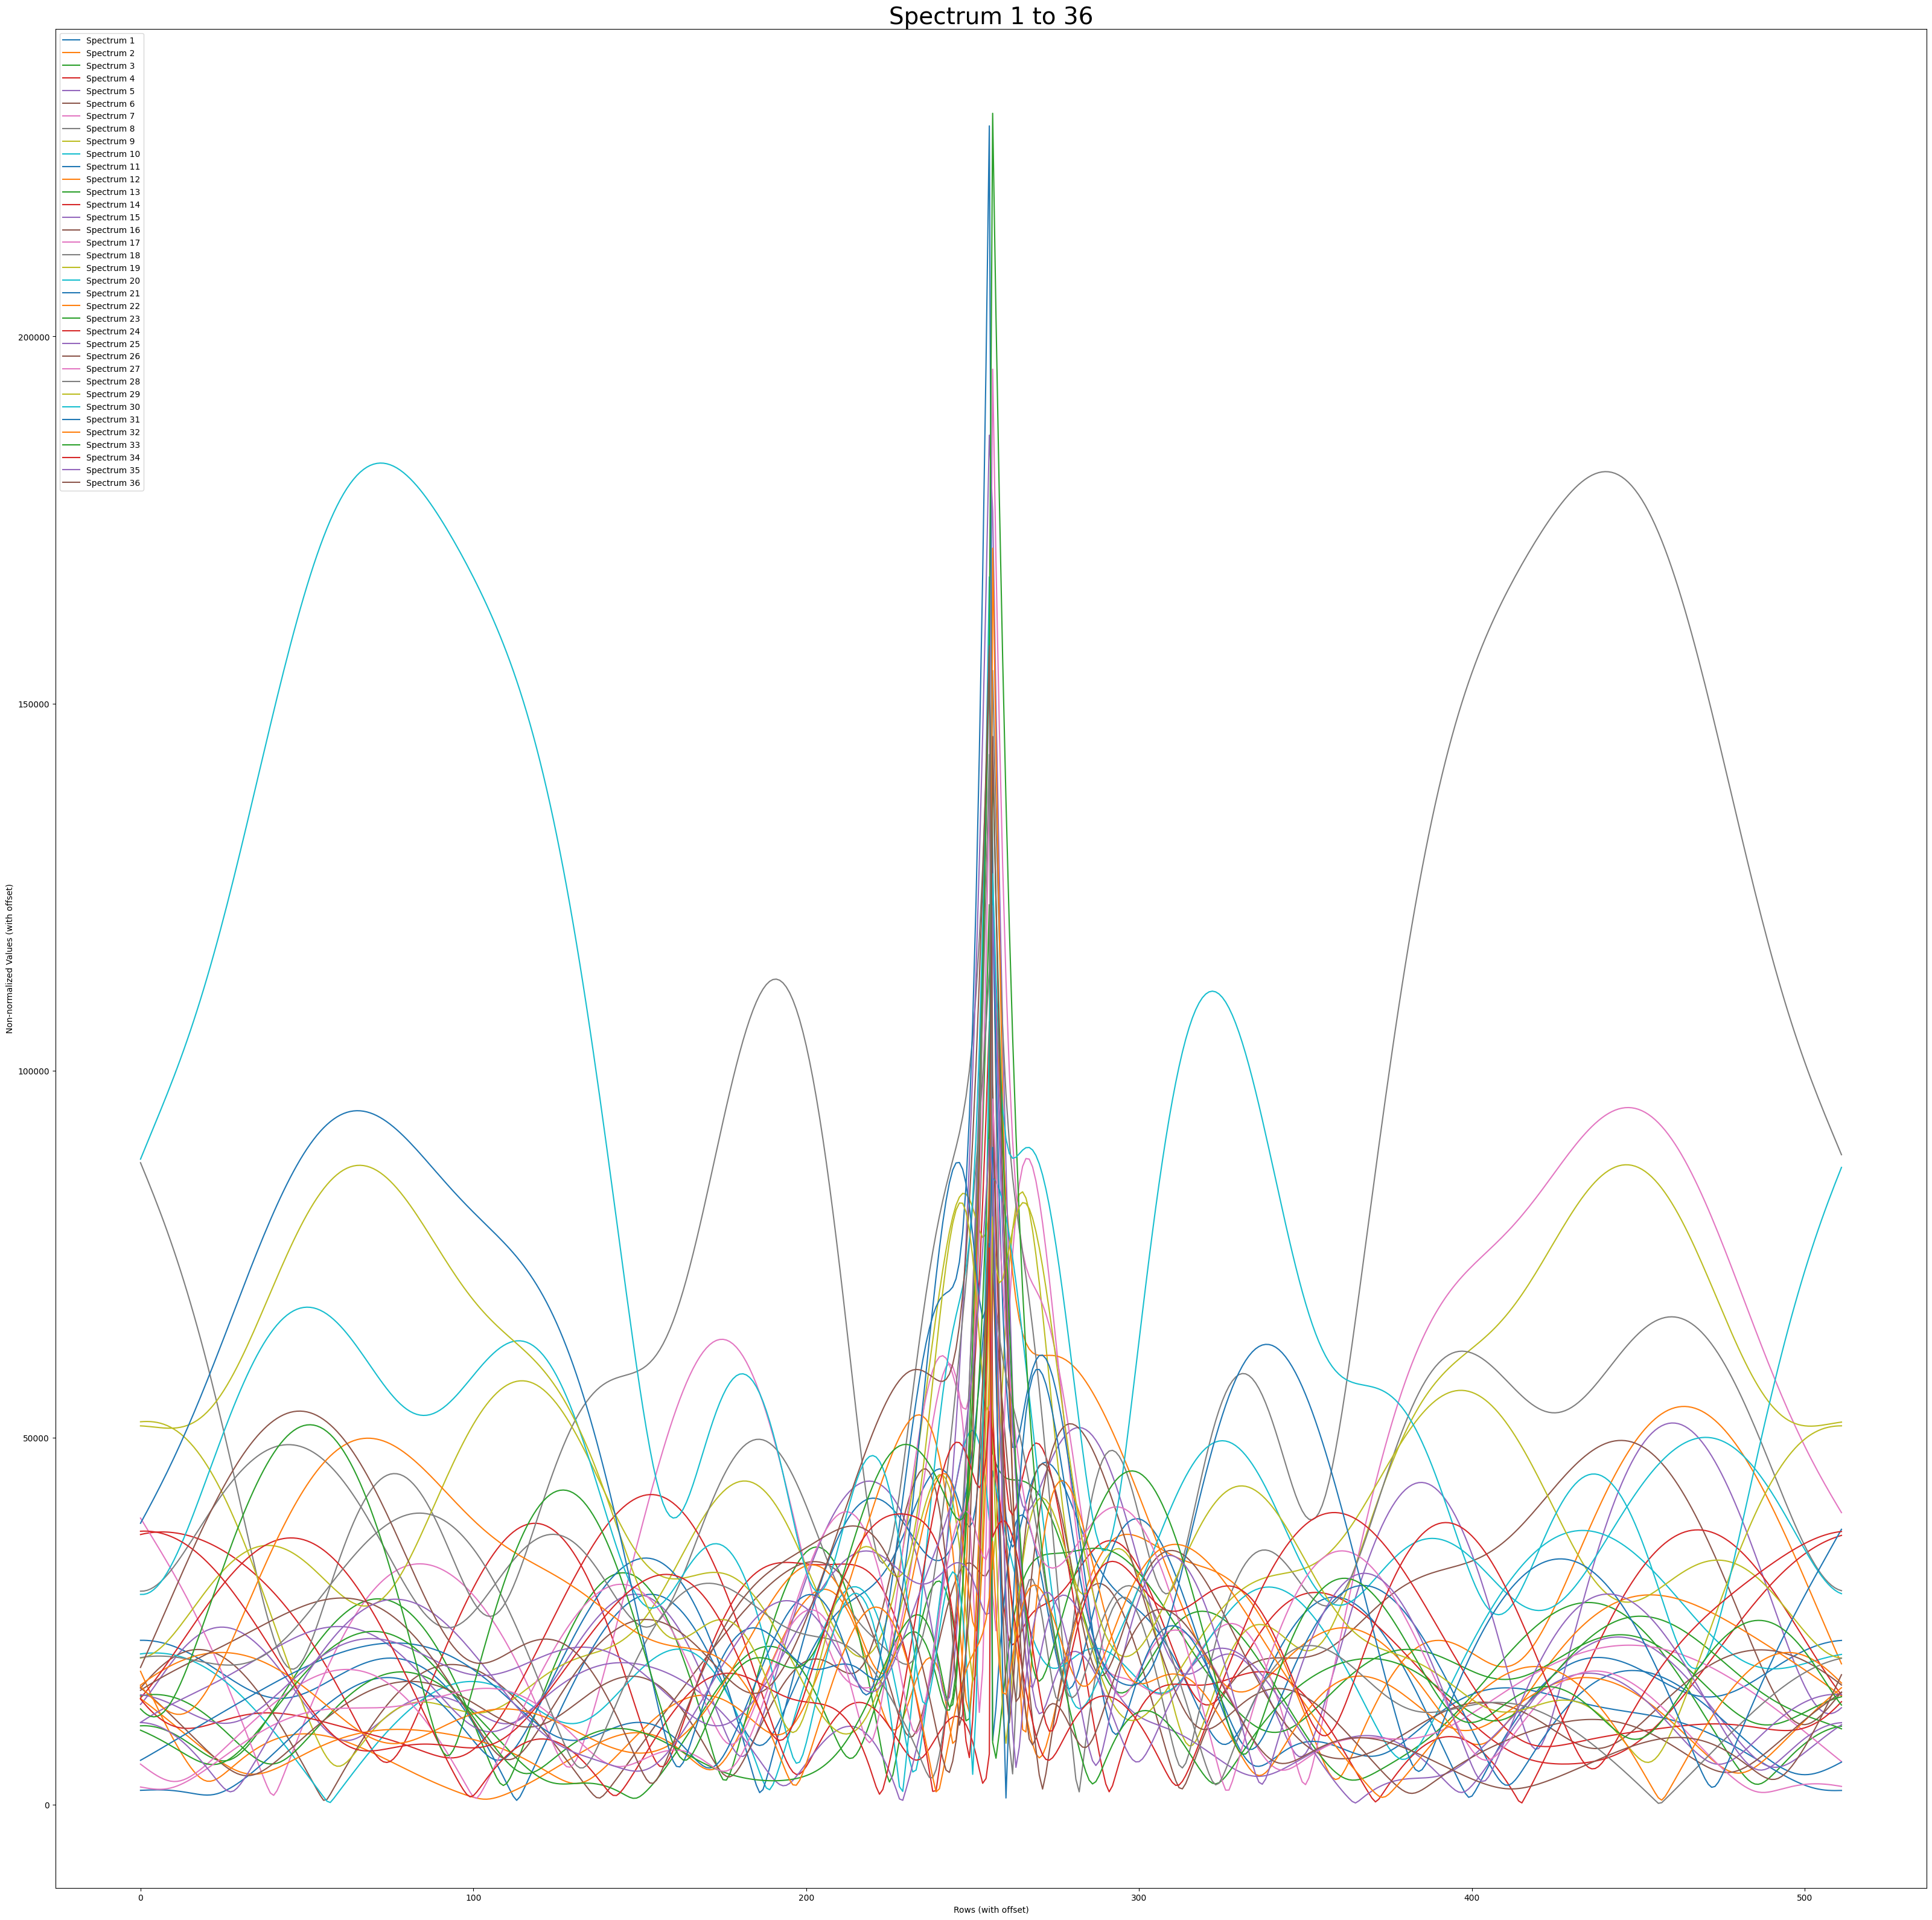

In [ ]:
plot_columns_with_offsets_no_norm(fft_data_dim2_abs,1,36,0,0)

In [ ]:
fft_data_dim2_abs[:, 0]

#### 2d

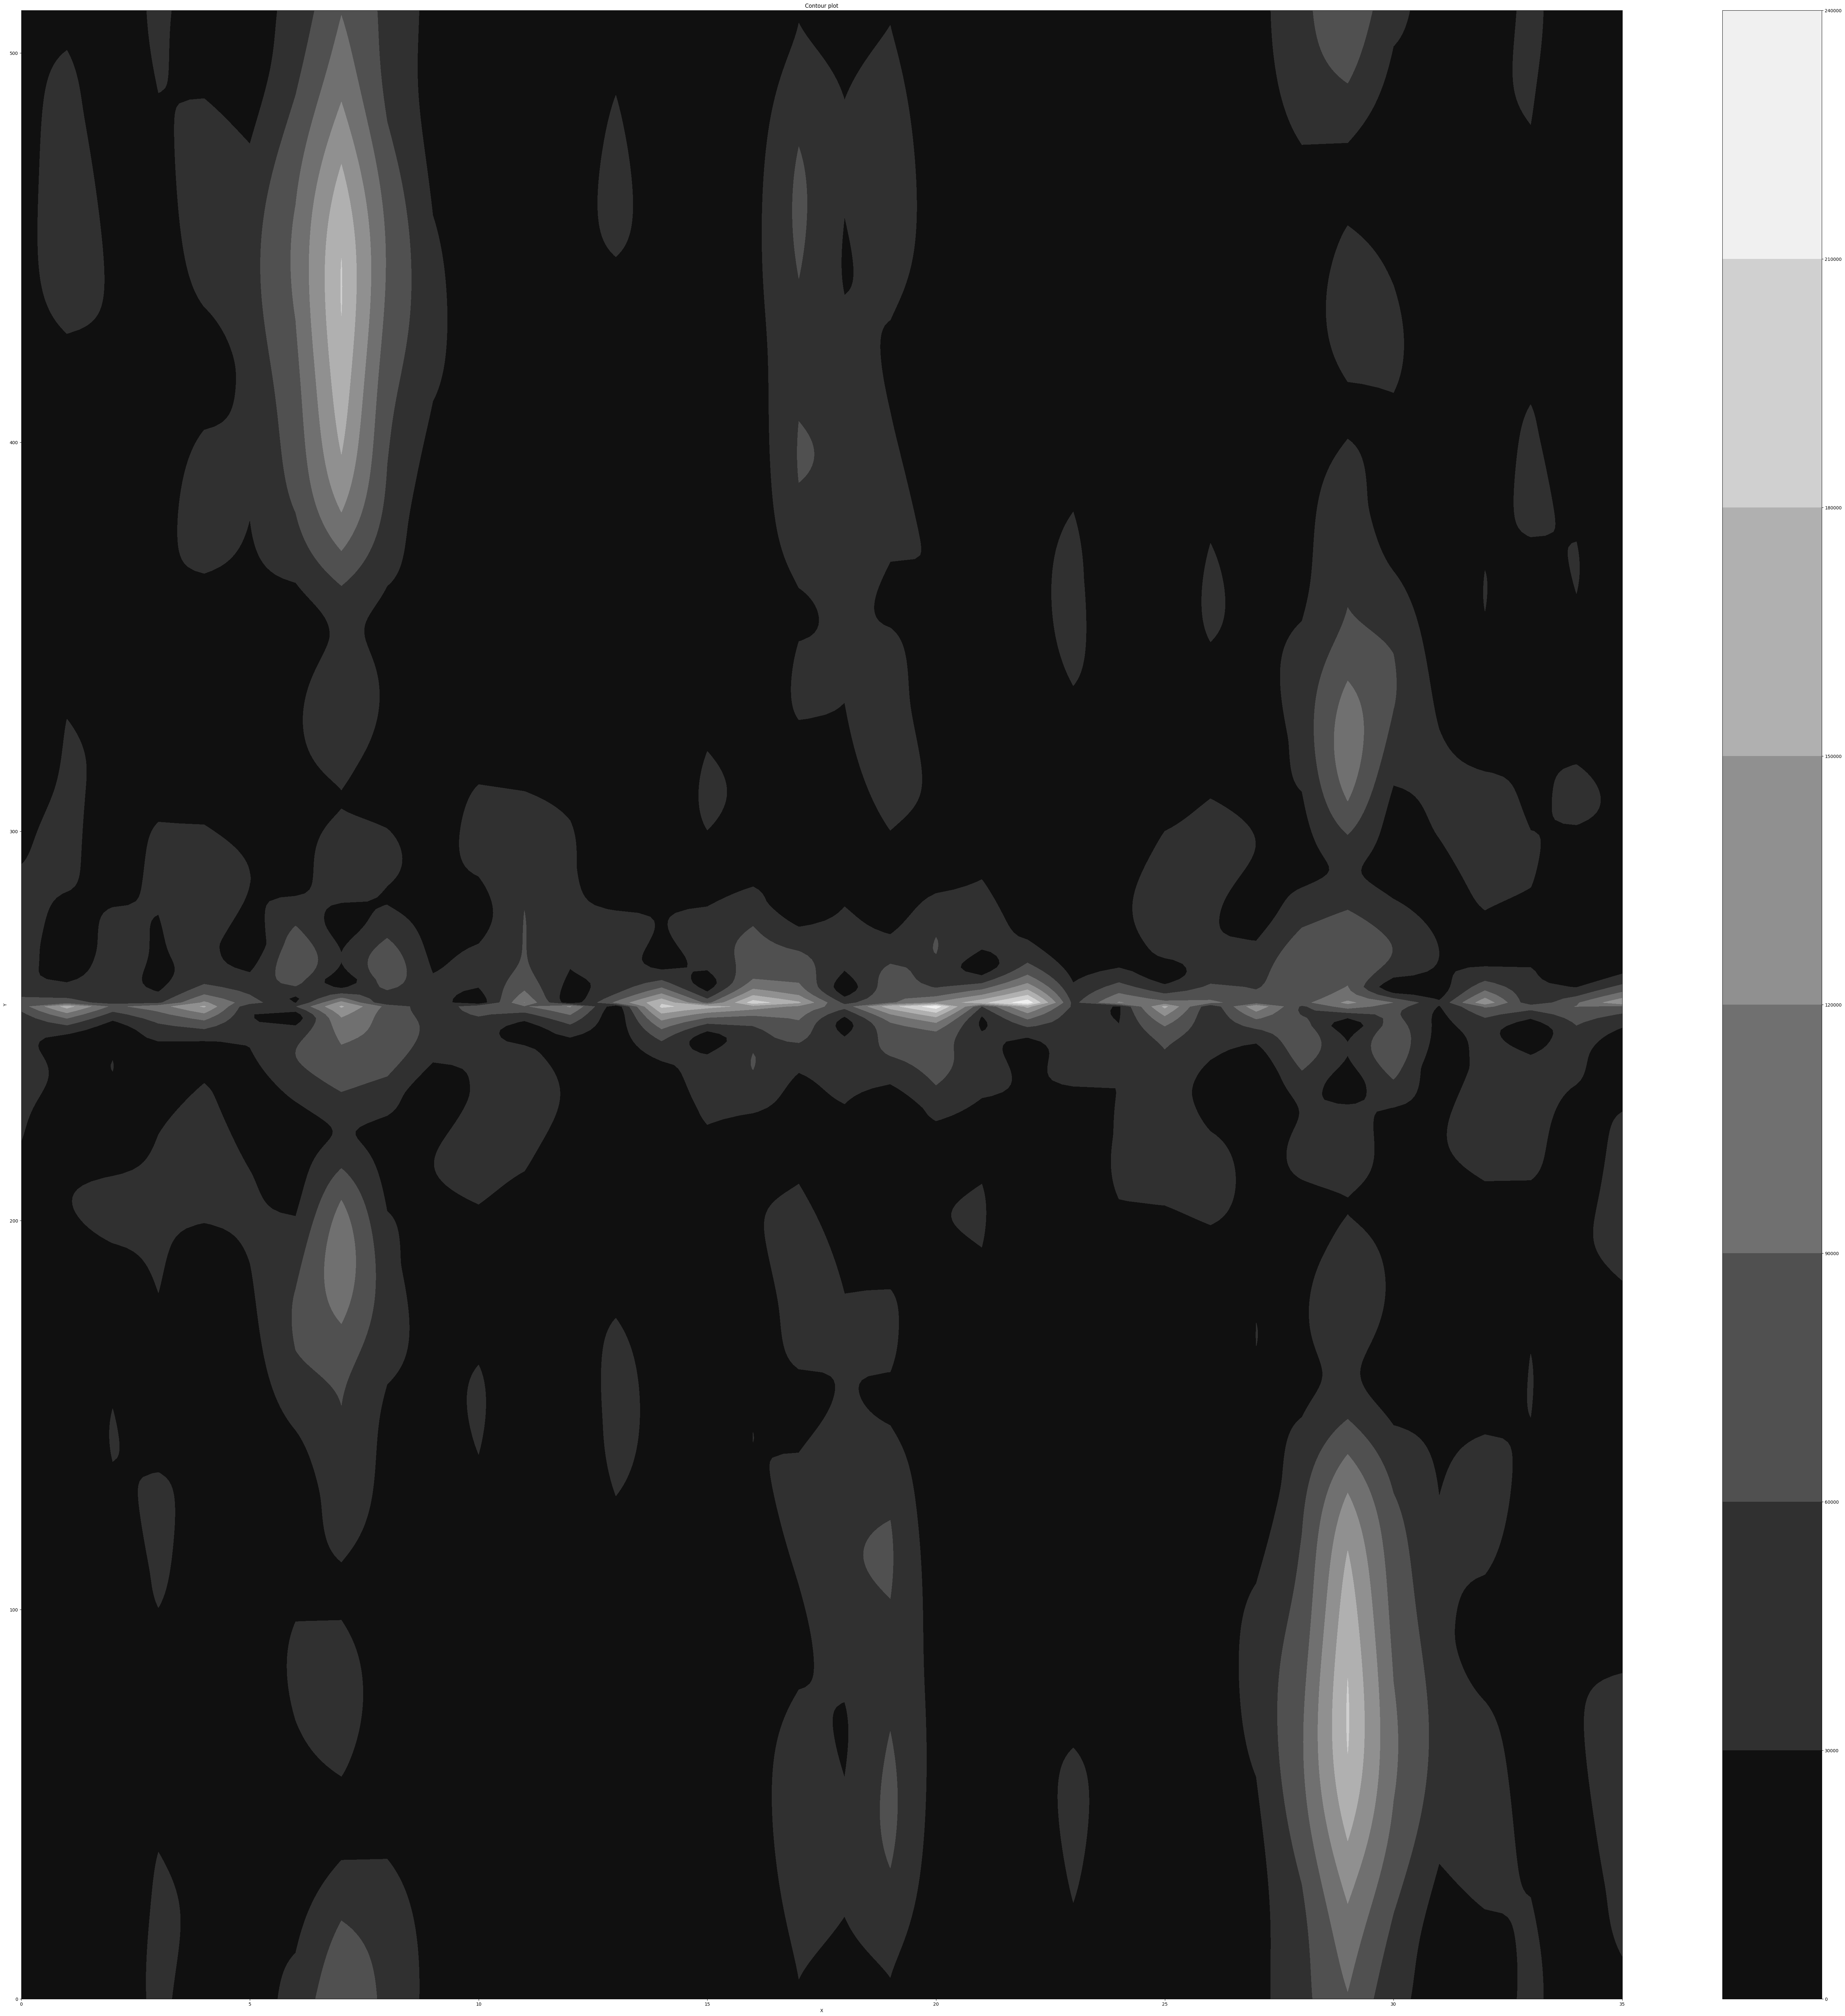

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fft_data_dim2_abs =  fft_data_dim2_abs

# assuming fft_data_dim2_abs is the 2D data
# generate grid for the contour plot
x = np.arange(0, fft_data_dim2_abs.shape[1])
y = np.arange(0, fft_data_dim2_abs.shape[0])
X, Y = np.meshgrid(x, y)

# create the contour plot
plt.figure(figsize=(80, 80))
plt.contourf(X, Y, fft_data_dim2_abs, cmap='gray') # Change colormap
plt.colorbar()  # optional, to show color scale
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

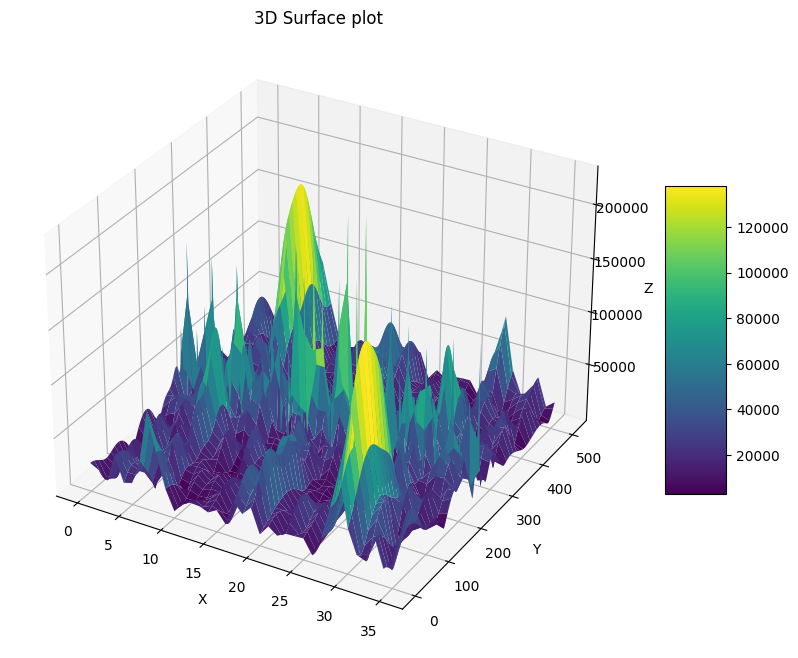

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# assuming fft_data_dim2_abs is the 2D data
# generate grid for the 3D plot
x = np.arange(0, fft_data_dim2_abs.shape[1])
y = np.arange(0, fft_data_dim2_abs.shape[0])
X, Y = np.meshgrid(x, y)

# create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, fft_data_dim2_abs, cmap='viridis')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('3D Surface plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
# install tools for pdf output

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
# output as PDF
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/MRS_2D.ipynb' --output-dir /content/

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MRS_2D.ipynb to pdf
[NbConvertApp] Support files will be in MRS_2D_files/
[NbConvertApp] Making directory ./MRS_2D_files
[NbConvertApp] Making directory ./MRS_2D_files
[NbConvertApp] Making directory ./MRS_2D_files
[NbConvertApp] Writing 73328 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1443102 bytes to /content/MRS_2D.pdf
